## Evaluating deep learning methods for prediction of density of Ionic Liquids

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Using a baseline Multi-Layer Perceptron model first
![hi](mlp1.png)


### Experiments
* Using Keras (Deep learning API for python) + Dataset of 25991 rows, 190 features. 190 includes descriptors+T,P
* Hyperparameter tuning, did grid search that ran for ~day
* Chose the Adam optimizer ,500 epochs and batch_size of 30
* Varied the architecture from 2-5 layers and 16,32,64,128 neurons each
* In most papers I referred architectures were varied like this and then the best model was eventually selected
* Got decent R2 and rmse values for L2-128.
* R2 of 0.984,0.985 for val and test respectively 
* RMSE of 20.85,20.7 for val and test respectively 

   Models  rmse_train\n   rmse_val  rmse_test
0   L2_16     80.716897  80.970078  80.840248
1   L2_32     43.544238  43.717270  43.692952
2   L2_64     31.858472  32.018199  32.041916
3  L2_128     20.490784  20.846611  20.701583


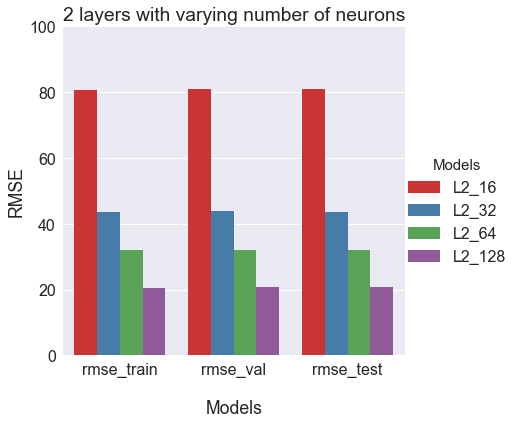

In [31]:
df=pd.read_excel('group_meeting.xlsx',sheetname=0)
print(df)
df=pd.melt(df, id_vars="Models")
sns.set(font_scale=1.6)
fig=sns.factorplot(x='variable',y="value",hue="Models",data=df,kind='bar',palette='Set1',size=6)
sns.set_style("white")
fig.set_xlabels("Models")
fig.set_ylabels("RMSE")
fig.set(ylim=(0, 100))
plt.title('2 layers with varying number of neurons')
fig.savefig('Fig1.pdf')

   Models  r2_train    r2_val   r2_test
0   L2_16  0.775104  0.773400  0.775551
1   L2_32  0.931952  0.931582  0.931859
2   L2_64  0.964179  0.963969  0.963977
3  L2_128  0.984695  0.984241  0.984508


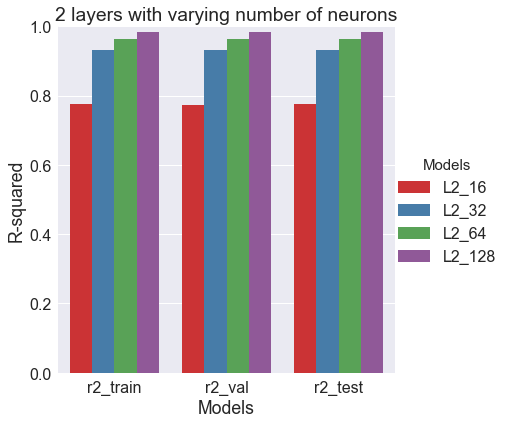

In [24]:
df=pd.read_excel('group_meeting.xlsx',sheetname=1) 
print(df)
df=pd.melt(df, id_vars="Models")
sns.set(font_scale=1.6)
fig=sns.factorplot(x='variable',y="value",hue="Models",data=df,kind='bar',palette='Set1',size=6)
sns.set_style("white")
fig.set_xlabels("Models")
fig.set_ylabels("R-squared")
fig.set(ylim=(0, 1))
plt.title('2 layers with varying number of neurons')
fig.savefig('Fig1.pdf')

### Evaluated the model on another dataset from literature
* Dataset for training: 1330 rows, 12 features. 
* Dataset for testing: 301 rows, 12 features
* Used the architecture of L2 and 128 neurons with their dataset

![hi](fatehi.png)

![hi](aard.png)

![hi](fatehi_network.png)

    Models    variable    value
0  L2-N128  aard_train  8.49539
1   Fatehi  aard_train  0.01900
2  L2-N128    aard_val  6.41768
3   Fatehi    aard_val  0.01900
4  L2-N128   aard_test  8.63599
5   Fatehi   aard_test  0.01400


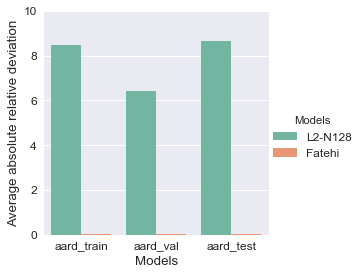

In [47]:
df=pd.read_excel('group_meeting.xlsx',sheetname=4) 
df=pd.melt(df, id_vars="Models")
print(df)
sns.set(font_scale=1.2)
fig=sns.factorplot(x='variable',y="value",hue="Models",data=df,kind='bar',palette='Set2',size=4)
sns.set_style("white")
fig.set_xlabels("Models")
fig.set_ylabels("Average absolute relative deviation")
fig.set(ylim=(0, 10))

#### Possible reasons for disparity:
* VERY Different network architecture
* 8 out of 12 features are mass of 1st,2nd,3rd etc branch, rest are T,P and np.of rings/no. of branches
* Also they have a different optimizer (Levenberg Marquerdt)
* Not sure if a comparison is also worthwhile since they tweaked the network alot for their results

### But the goal is to see how to evaluate a network like this
![hi](mlp2.png)

### ...Which could possibly be helpful to evaluate mixtures or salts of different properties. Mixtures like water+IL or alcohol+water+IL 

#### There are multiple benefits of such merged DNNs.
* For instance, the DNN has the flexibility to handle various inputs differently
* One mode can be text/images and the other can be descriptors/features
* Helps to combine different data modalities
* In addition, new features can be added conveniently without messing around with the existing network structure.

   Models      variable      value
0  merged  rmse_train\n  32.931309
1  merged      rmse_val  33.030526
2  merged     rmse_test  31.960683


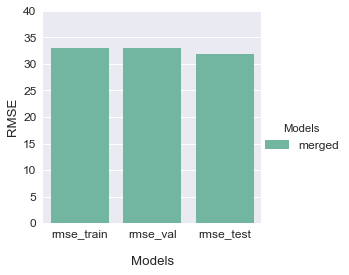

In [7]:
df=pd.read_excel('group_meeting.xlsx',sheetname=5) 
df=pd.melt(df, id_vars="Models")
print(df)
sns.set(font_scale=1.2)
fig=sns.factorplot(x='variable',y="value",hue="Models",data=df,kind='bar',palette='Set2',size=4)
sns.set_style("white")
fig.set_xlabels("Models")
fig.set_ylabels("RMSE")
fig.set(ylim=(0, 40))

   Models  variable     value
0  merged  r2_train  0.962662
1  merged    r2_val  0.962440
2  merged   r2_test  0.965023


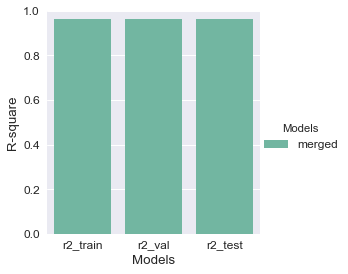

In [12]:
df=pd.read_excel('group_meeting.xlsx',sheetname=6) 
df=pd.melt(df, id_vars="Models")
print(df)
sns.set(font_scale=1.2)
fig=sns.factorplot(x='variable',y="value",hue="Models",data=df,kind='bar',palette='Set2',size=4)
sns.set_style("white")
fig.set_xlabels("Models")
fig.set_ylabels("R-square")
fig.set(ylim=(0, 1))

### future work:
* use more data/calculate more descriptors, maybe do feature selection
* Use image data ,not sure how that might work  

![cat](cation_images/cation100.png) ![an](anion_images/anion1.png)

In [ ]:
#take inputsratios 